# What is Simpson's Paradox?

An overview of Simpson's Paradox in the cases that we address in this project and how to detect it as well as breif complexity analysis of the problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# for outputting all alone variables
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

It's generally discussed in terms of two variables, both discrete, though binary or mulit level cases are both commonly used.  A popular example is the berkeley admissions data set.  The claim was that it was biased againt women because at the university scale it was, but from other departments they actually admitted women at much higher rates. It turned out the departments that had low aceptance rates were the ones with most of the women applicants.

## Regression Based Simpson's Paradox


It can manifest in how a decision variable relates to others that $x_k$ is predicted differently for different values of $x_j$ 
another way Simpson's Paradox could manifest is through latent clusters.  It can manifest in relationships among variables.  

In [2]:
# 
N = 100
# sample data from 2 clusters
mu = np.asarray([[1,1],[5,5]])

z = np.random.randint(0,2,N)
x = np.asarray([np.random.multivariate_normal(mu[z_i],[[.6,-1],[0,.6]]) for z_i in z])

latent_df = pd.DataFrame(data=x,
                       columns = ['x1', 'x2'])

# now we add somoe more columns
color_z = {0:'r', 1:'b'}
char_zy = {0: {0:'x', 1:'o'}, 1:{0:'o', 1:'x'}}

latent_df['color'] = [color_z[z_i] for z_i in z]
y = np.random.choice([0,1],N,p=[.7,.3])
latent_df['y'] = y
latent_df['char'] = [char_zy[zi][yi] for zi,yi in zip(z,y)]

/home/smb/anaconda2/envs/simpsonsparadox/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


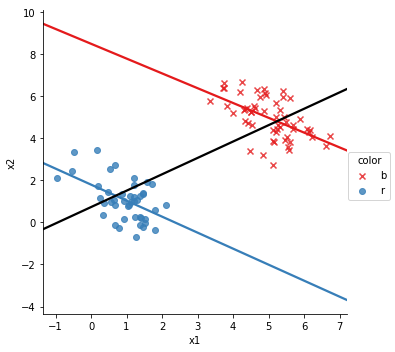

In [3]:

sns.lmplot('x1','x2', data=latent_df, hue='color', ci=None,
               markers =['x','o'], palette="Set1")
# adda whole data regression line, but don't cover the scatter data
sns.regplot('x1','x2', data=latent_df, color='black', scatter=False, ci=None)

in this, if we ignore the color, x_1 and x_2 are positivly correlated, shown by the black line, but in each color, they're negatively correlated.  This is a type of plot that we will want to generate a lot, so we've included it in the package

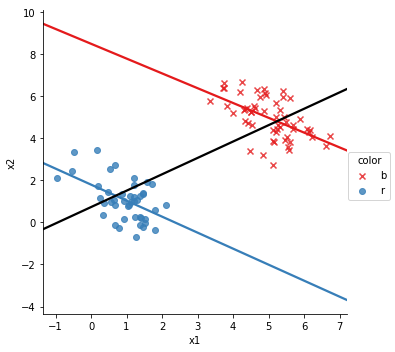

In [4]:
from sp_data_util import sp_plot

sp_plot(latent_df, 'x1','x2','color')

In [5]:
latent_df['x1'].corr(latent_df['x2'])
latent_df.groupby('color')['x1','x2'].corr()

x1       x2
color                     
b     x1  1.00000 -0.53890
      x2 -0.53890  1.00000
r     x1  1.00000 -0.50993
      x2 -0.50993  1.00000

So, we can see that the correlation between $x_1$ and $x_2$ is positive in the whole data set and negative in each subgroup.  This is Simpson's paradox. So, to detect Simpson's Paradox in a data set with $d$ continuous variables and $c$ discrete variables, we can compute correlation matrix for all of the data, one $d \times d$ matrix.  Then for each of the $c$ discrete variables with $k_c$ levels we compute an additional $d \times d$ matrix for each level of each variable.  

So, we need to compute $1+ \sum_{i = 1}^c k_i$ correlation matrices of size $d \times d$ and compare the signs of each element in the lower half of all the $\sum_{i = 1}^c k_i$ for subgroup levels to the first one. 